# Introduction

In this project, I am going to explore the data on the ongoing covid-19 pandemic. THe aim being to answer a few questions of interest. he questions are targetted ad learning from the countries that have the most success - early one of course, as the pandemic is still ongoing - in respondng to the pandemic.

The questions of concern are related to ability to respond and control the spread of the pandemic. THe questions are:

1. Which countries had the best & worst performances in delaying the onset of transmission. 
2. Which countries have reached the peak and past it, and which ones did that first
3. Which countries have had a re-surge in cases after an initial control 

The aim of answering these questions is to point further ivestigations in to the which countries to study further. For example, from answering quesiton 1, the next step will be to study the response of these coutnries and example what they did differently from couties that perfromed the worst. This project stops at answering the data questions as listed above and does not drive deeper into answering the specific response details of the countries.

Let's dig in, by loking at out data set.


# Data Source

The data for this study is sourced from Kaggle at this link:

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset


Let's have a close look at the data, to gain some insights about how it is organized and what initial steps we need to take to make the data uaeable for answering our questions above.

In [922]:
import numpy as np
import pandas as pd

from datetime import datetime as dt
from dateutil import parser as ps
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [923]:
# We will need this a number of times, so let's keep a global value 
nan_value = float('NaN')

In [924]:
df = pd.read_csv('covid_19_data.csv')

In [925]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [926]:
df.shape

(18965, 8)

In [927]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
18960,18961,04/26/2020,Wyoming,US,2020-04-27 02:31:20,502.0,7.0,0.0
18961,18962,04/26/2020,Xinjiang,Mainland China,2020-04-27 02:31:20,76.0,3.0,73.0
18962,18963,04/26/2020,Yukon,Canada,2020-04-27 02:31:20,11.0,0.0,0.0
18963,18964,04/26/2020,Yunnan,Mainland China,2020-04-27 02:31:20,185.0,2.0,181.0
18964,18965,04/26/2020,Zhejiang,Mainland China,2020-04-27 02:31:20,1268.0,1.0,1258.0


In [928]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [929]:
df_all = df
df = df.drop_duplicates(['ObservationDate','Province/State','Country/Region','Last Update','Confirmed','Deaths','Recovered'])

In [930]:
df.shape

(18965, 8)

In [931]:
df["Date"] = [ps.parse(t) for t in df['Last Update']]


In [932]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22 17:00:00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22 17:00:00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22 17:00:00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22 17:00:00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22 17:00:00


In [933]:
df.shape

(18965, 9)

# Understanding the Data
Let's explore the data structure further, to understand the structure of the information. We will take a single country and look at the data in detail. but bofore we do that let's get the uniwue names of the countries in the data set

In [934]:
countries = df["Country/Region"].unique()

In [935]:
countries

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [936]:
countries.shape

(220,)

In [937]:
#Let's pick one country and view the data

nigeria = df[df["Country/Region"]=="Nigeria"] #.sort_values("Last Update")

In [938]:
nigeria

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
2683,2684,02/28/2020,NaN,Nigeria,2020-02-28T16:23:03,1.0,0.0,0.0,2020-02-28 16:23:03
2800,2801,02/29/2020,NaN,Nigeria,2020-02-28T16:23:03,1.0,0.0,0.0,2020-02-28 16:23:03
2926,2927,03/01/2020,NaN,Nigeria,2020-02-28T16:23:03,1.0,0.0,0.0,2020-02-28 16:23:03
3060,3061,03/02/2020,NaN,Nigeria,2020-02-28T16:23:03,1.0,0.0,0.0,2020-02-28 16:23:03
3209,3210,03/03/2020,NaN,Nigeria,2020-02-28T16:23:03,1.0,0.0,0.0,2020-02-28 16:23:03
3370,3371,03/04/2020,NaN,Nigeria,2020-02-28T16:23:03,1.0,0.0,0.0,2020-02-28 16:23:03
3538,3539,03/05/2020,NaN,Nigeria,2020-02-28T16:23:03,1.0,0.0,0.0,2020-02-28 16:23:03
3725,3726,03/06/2020,NaN,Nigeria,2020-02-28T16:23:03,1.0,0.0,0.0,2020-02-28 16:23:03
3940,3941,03/07/2020,NaN,Nigeria,2020-02-28T16:23:03,1.0,0.0,0.0,2020-02-28 16:23:03
4181,4182,03/08/2020,NaN,Nigeria,2020-02-28T16:23:03,1.0,0.0,0.0,2020-02-28 16:23:03


Text(0, 0.5, 'Confirmed Cases')

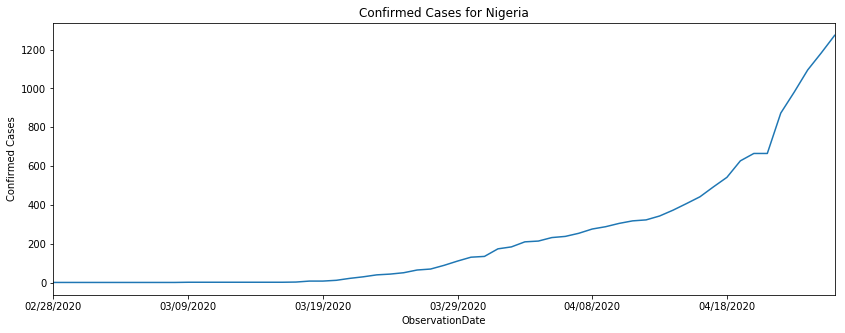

In [939]:
ax =nigeria.plot(kind='line', x="ObservationDate", y='Confirmed', legend=False, figsize=(14,5),
                title="Confirmed Cases for Nigeria")
ax .set_ylabel("Confirmed Cases")

# Analysis - Nigeria

The nigeria graph appears to be a steady increase. Let's have a look at a few other coutnries. Take **China**, where the pandemic began.

To help with building the charts let's define a function we can reuse.

In [940]:
def plot_country_cases(df, country, returndf=False, col='Confirmed'):
    '''
    Plots the graph of a country
    
    INPUTS:
    df - the source dataframe
    country - the country to filter out of the df, and plot
    returndf - bool, if Tru return a dataframe, otherwise it return None, default is False
    col - the column cotaining the data to be plotter. Defualt is 'Confirmed'
    
    OUTPUTS:
    ctry - if 'returndf' is true returns the filterd dataframe, otherwise None
    '''
    ctry = df[df["Country/Region"]==country] 
    ax =ctry.plot(kind='line', x="ObservationDate", 
                     y=col, legend=False, figsize=(14,5),
                    title=country)
    ax .set_ylabel(col)
    if returndf:
        return ctry

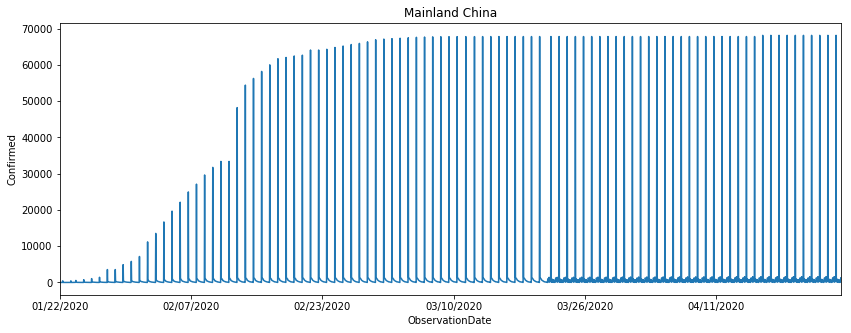

In [941]:
china = plot_country_cases(df, "Mainland China", True)

In [942]:
china.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22 17:00:00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22 17:00:00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22 17:00:00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22 17:00:00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22 17:00:00


# Analysis - China

The china graph indicates the data for coutries with multiple regions requires more processing. let's separate the countries into two buckets - those with regions in the dataset such as China (that will require more processing), and those without regions like Nigeria (that we can plots the charts directly for).

In [943]:
no_region_countries = df[pd.isna(df['Province/State'])]["Country/Region"].unique()

In [944]:
no_region_countries

array(['Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines',
       'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia',
       'France', 'Nepal', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK',
       'Russia', 'Sweden', 'Germany', 'Spain', 'Belgium', 'Egypt', 'Iran',
       'Lebanon', 'Oman', 'Afghanistan', 'Bahrain', 'Iraq', 'Kuwait',
       'Algeria', 'Croatia', 'Switzerland', 'Austria', 'Israel',
       'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway',
       'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino',
       ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand',
       'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco',
       'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Uk

In [945]:
len(no_region_countries)

214

In [946]:
region_countries = [ c for c in countries if c not in no_region_countries]

In [947]:
region_countries

['Mainland China', 'Hong Kong', 'Macau', 'US', 'Canada', 'Others']

- we will remove others

In [948]:
del region_countries[-1]

In [949]:
print(region_countries)

['Mainland China', 'Hong Kong', 'Macau', 'US', 'Canada']


In [950]:
len(region_countries)

5

In [951]:
df_no_region_countries = df[df["Country/Region"].isin(no_region_countries)]

In [952]:
df_no_region_countries.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
28,29,01/22/2020,Taiwan,Taiwan,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22 17:00:00
35,36,01/22/2020,NaN,Japan,1/22/2020 17:00,2.0,0.0,0.0,2020-01-22 17:00:00
36,37,01/22/2020,NaN,Thailand,1/22/2020 17:00,2.0,0.0,0.0,2020-01-22 17:00:00
37,38,01/22/2020,NaN,South Korea,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22 17:00:00
66,67,01/23/2020,Taiwan,Taiwan,1/23/20 17:00,1.0,0.0,0.0,2020-01-23 17:00:00


# Analysis - The Two Buckets 

### Not so cleanly cut

- We've got it wrong as some countries like Taiwan appear to not be NaN for **Province/State** and still made it into the **no_region_countries** list. Let's take a closer look at **Taiwan**.
 
- But before we do, let's check is this is unique to taiwan or not.

In [953]:
mix_countries_df = df_no_region_countries[pd.notna(df_no_region_countries['Province/State'])]
mix_countries = mix_countries_df["Country/Region"].unique()
mix_countries

array(['Taiwan', 'Australia', 'Germany', 'Israel', 'Lebanon', 'Iraq',
       'Austria', 'France', 'UK', 'Denmark', 'Netherlands'], dtype=object)

In [954]:
mix_countries.shape

(11,)

In [955]:
taiwan = df[df["Country/Region"]=="Taiwan"]
taiwan['Province/State'].unique()


array(['Taiwan', nan], dtype=object)

In [956]:
#Let's take a closer look.
taiwan[pd.isna(taiwan["Province/State"])]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
4790,4791,03/11/2020,NaN,Taiwan,2020-03-11T20:13:14,48.0,1.0,17.0,2020-03-11 20:13:14
5009,5010,03/12/2020,NaN,Taiwan,2020-03-12T08:13:09,49.0,1.0,20.0,2020-03-12 08:13:09
5382,5383,03/13/2020,NaN,Taiwan,2020-03-11T20:00:00,50.0,1.0,20.0,2020-03-11 20:00:00
5472,5473,03/14/2020,NaN,Taiwan,2020-03-14T07:13:11,53.0,1.0,20.0,2020-03-14 07:13:11
5723,5724,03/15/2020,NaN,Taiwan,2020-03-15T06:53:03,59.0,1.0,20.0,2020-03-15 06:53:03
5985,5986,03/16/2020,NaN,Taiwan,2020-03-16T14:38:45,67.0,1.0,20.0,2020-03-16 14:38:45
6256,6257,03/17/2020,NaN,Taiwan,2020-03-17T08:13:11,77.0,1.0,22.0,2020-03-17 08:13:11
6531,6532,03/18/2020,NaN,Taiwan,2020-03-18T07:13:12,100.0,1.0,22.0,2020-03-18 07:13:12
6828,6829,03/19/2020,NaN,Taiwan,2020-03-19T06:53:03,108.0,1.0,26.0,2020-03-19 06:53:03
7118,7119,03/20/2020,NaN,Taiwan,2020-03-20T09:43:03,135.0,2.0,26.0,2020-03-20 09:43:03


In [957]:
taiwan[pd.notna(taiwan["Province/State"])]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
28,29,01/22/2020,Taiwan,Taiwan,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22 17:00:00
66,67,01/23/2020,Taiwan,Taiwan,1/23/20 17:00,1.0,0.0,0.0,2020-01-23 17:00:00
107,108,01/24/2020,Taiwan,Taiwan,1/24/20 17:00,3.0,0.0,0.0,2020-01-24 17:00:00
154,155,01/25/2020,Taiwan,Taiwan,1/25/20 17:00,3.0,0.0,0.0,2020-01-25 17:00:00
199,200,01/26/2020,Taiwan,Taiwan,1/26/20 16:00,4.0,0.0,0.0,2020-01-26 16:00:00
247,248,01/27/2020,Taiwan,Taiwan,1/27/20 23:59,5.0,0.0,0.0,2020-01-27 23:59:00
296,297,01/28/2020,Taiwan,Taiwan,1/28/20 23:00,8.0,0.0,0.0,2020-01-28 23:00:00
349,350,01/29/2020,Taiwan,Taiwan,1/29/20 19:30,8.0,0.0,0.0,2020-01-29 19:30:00
403,404,01/30/2020,Taiwan,Taiwan,1/30/20 16:00,9.0,0.0,0.0,2020-01-30 16:00:00
461,462,01/31/2020,Taiwan,Taiwan,1/31/2020 23:59,10.0,0.0,0.0,2020-01-31 23:59:00


# Analysis - Taiwan

- From an observation of the data, it appears entries switched form using NaN for Provice/State from teh 11th of March and remained that way. Let's have alook as some other countries.

- We will define a function to make this easier to repeat


In [958]:
def country_nan_views(df, country):
    '''
    Provides three dataframe from the source data frame, one filtered for the country of interest
    another filterd to indicateif it has NaNs in the Provide/State Column, 
    and a third it it doesn't
    
    INPUTS:
    df - the source dataframe
    country - the country ofinterest
    
    OUTPUTS:
    ctry - dataframe containing data for country of interest
    ctra_na - dataframe with Provide/State column with NaN
    ctry_notan - dataframe with Provide/State column without NaN
    '''
    ctry = df[df["Country/Region"]==country]
    ctra_na = (ctry[pd.isna(ctry["Province/State"])])
    ctry_notan = (ctry[pd.notna(ctry["Province/State"])])
    return ctry, ctra_na, ctry_notan
    

In [959]:
Australia, a_, a__ = country_nan_views(df, "Australia")

In [960]:
a_

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
80,81,01/23/2020,NaN,Australia,1/23/20 17:00,0.0,0.0,0.0,2020-01-23 17:00:00
166,167,01/25/2020,NaN,Australia,1/25/20 17:00,4.0,0.0,0.0,2020-01-25 17:00:00
212,213,01/26/2020,NaN,Australia,1/26/20 16:00,4.0,0.0,0.0,2020-01-26 16:00:00


In [961]:
a__

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
265,266,01/27/2020,New South Wales,Australia,1/27/20 23:59,4.0,0.0,0.0,2020-01-27 23:59:00
266,267,01/27/2020,Victoria,Australia,1/27/20 23:59,1.0,0.0,0.0,2020-01-27 23:59:00
316,317,01/28/2020,New South Wales,Australia,1/28/20 23:00,4.0,0.0,0.0,2020-01-28 23:00:00
317,318,01/28/2020,Victoria,Australia,1/28/20 23:00,1.0,0.0,0.0,2020-01-28 23:00:00
368,369,01/29/2020,New South Wales,Australia,1/29/20 19:30,4.0,0.0,0.0,2020-01-29 19:30:00
369,370,01/29/2020,Victoria,Australia,1/29/20 19:30,1.0,0.0,0.0,2020-01-29 19:30:00
423,424,01/30/2020,New South Wales,Australia,1/30/20 16:00,4.0,0.0,2.0,2020-01-30 16:00:00
424,425,01/30/2020,Victoria,Australia,1/30/20 16:00,2.0,0.0,0.0,2020-01-30 16:00:00
425,426,01/30/2020,Queensland,Australia,1/30/20 16:00,3.0,0.0,0.0,2020-01-30 16:00:00
472,473,01/31/2020,New South Wales,Australia,1/31/2020 23:59,4.0,0.0,2.0,2020-01-31 23:59:00


# Analysis - Australia, Taiwan & Final Decision
- Australia had a separate set up.
- it is safer to group these mixed countries with countries that have regions

In [962]:
no_region_countries = [ c for c in no_region_countries if c not in mix_countries]

In [963]:
#let's recheck
rechecked = [c for c in no_region_countries if c in mix_countries]
rechecked

[]

- All clear, returned an empty list

In [964]:
region_countries  =  list(region_countries) + list(mix_countries)

In [965]:
region_countries

['Mainland China',
 'Hong Kong',
 'Macau',
 'US',
 'Canada',
 'Taiwan',
 'Australia',
 'Germany',
 'Israel',
 'Lebanon',
 'Iraq',
 'Austria',
 'France',
 'UK',
 'Denmark',
 'Netherlands']

In [966]:
len(region_countries)

16

In [967]:
no_region_countries

['Japan',
 'Thailand',
 'South Korea',
 'Singapore',
 'Philippines',
 'Malaysia',
 'Vietnam',
 'Mexico',
 'Brazil',
 'Colombia',
 'Nepal',
 'Cambodia',
 'Sri Lanka',
 'Ivory Coast',
 'Finland',
 'United Arab Emirates',
 'India',
 'Italy',
 'Russia',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Iran',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Pakistan',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'San Marino',
 ' Azerbaijan',
 'Belarus',
 'Iceland',
 'Lithuania',
 'New Zealand',
 'Nigeria',
 'North Ireland',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Czech Republic',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Saint Barthelemy',
 'Hungary',
 'Faroe Islands',
 'Gibraltar',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Palestine',
 'Bosnia and Herz

In [968]:
len(no_region_countries)

203

In [969]:
# Let's re-create the df_no_region_countries
df_no_region_countries = df[df["Country/Region"].isin(no_region_countries)]

In [970]:
df_no_region_countries.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
35,36,01/22/2020,NaN,Japan,1/22/2020 17:00,2.0,0.0,0.0,2020-01-22 17:00:00
36,37,01/22/2020,NaN,Thailand,1/22/2020 17:00,2.0,0.0,0.0,2020-01-22 17:00:00
37,38,01/22/2020,NaN,South Korea,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22 17:00:00
73,74,01/23/2020,NaN,Japan,1/23/20 17:00,1.0,0.0,0.0,2020-01-23 17:00:00
74,75,01/23/2020,NaN,Thailand,1/23/20 17:00,3.0,0.0,0.0,2020-01-23 17:00:00


In [971]:
# Let's recheeck to make sure the are nothing bu NaN's in the Province/State column

df_no_region_countries[pd.notna(df_no_region_countries["Province/State"])]["SNo"].count()

0

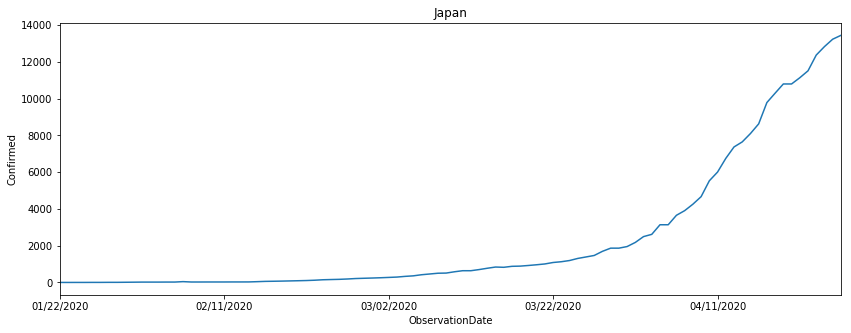

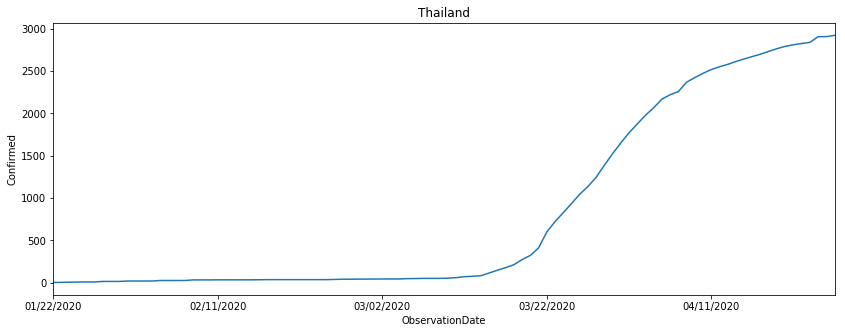

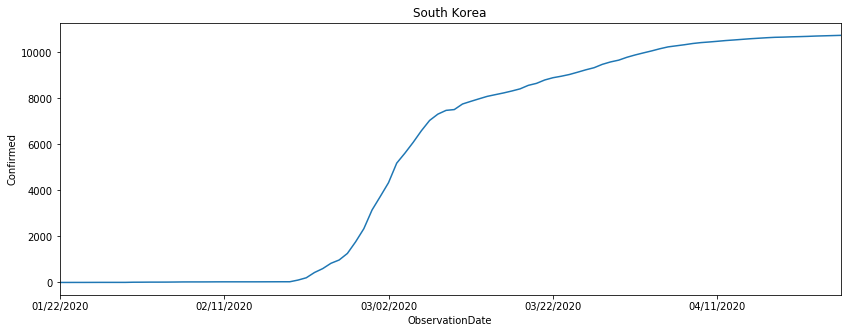

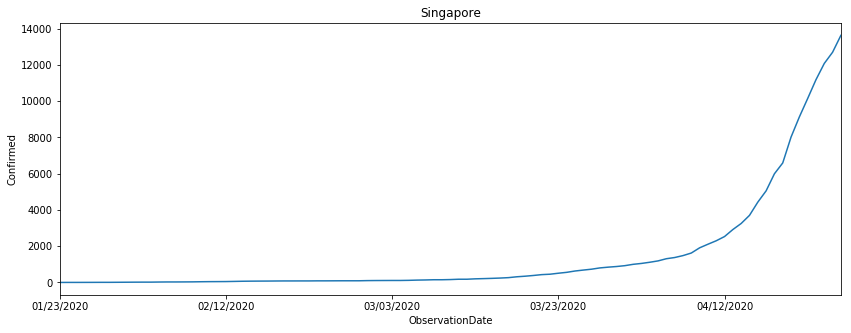

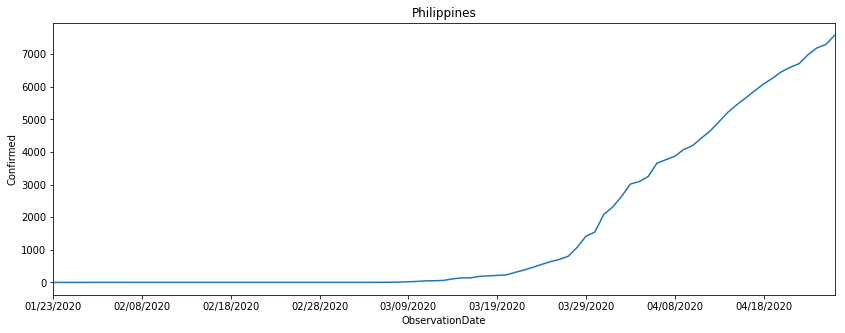

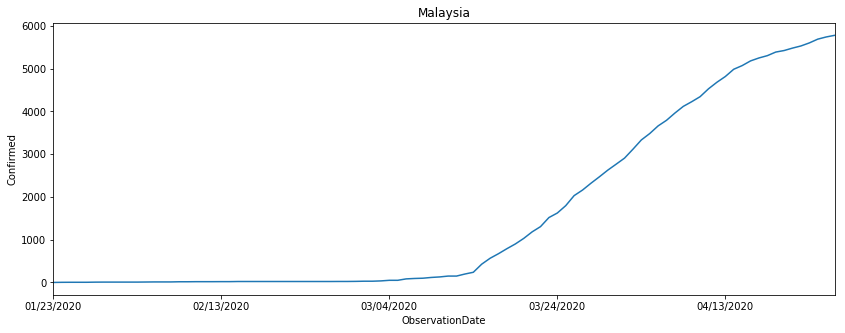

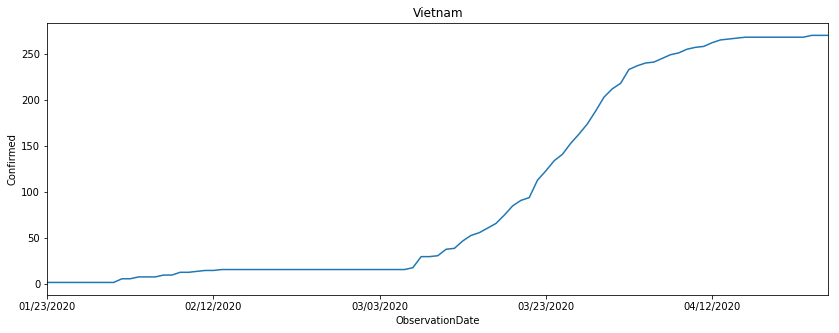

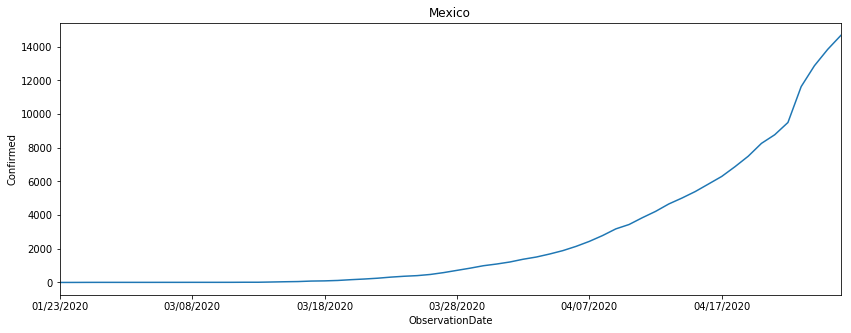

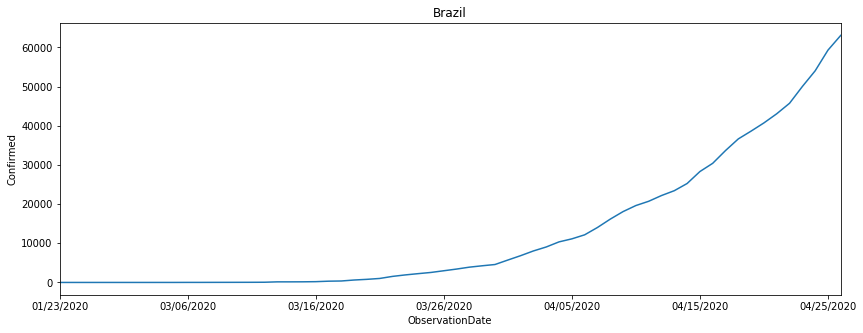

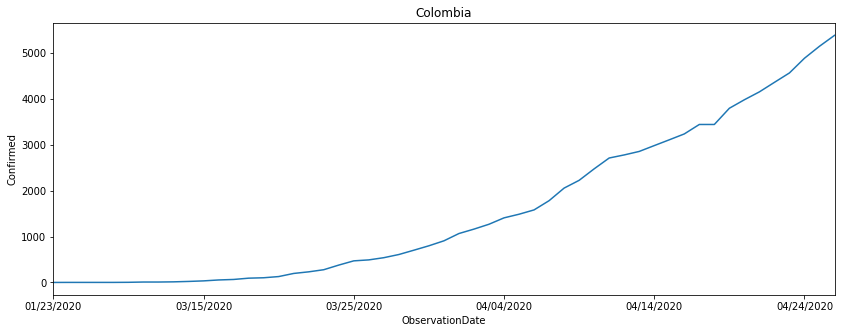

In [972]:
#let's polot a few no_region_countries counties
for i in range(10):
    plot_country_cases(df, no_region_countries[i])

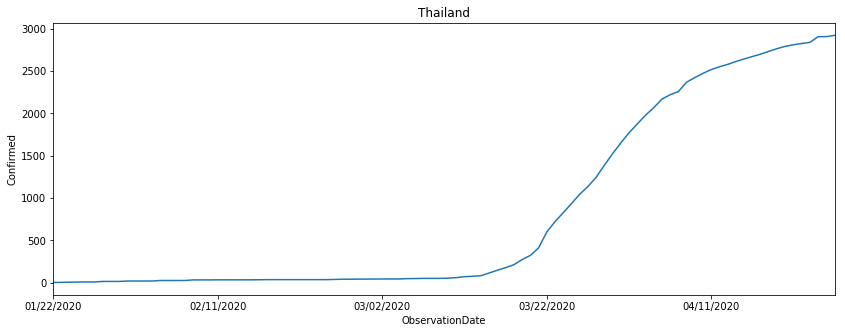

In [973]:
plot_country_cases(df, "Thailand")

# Processing Countries with Regions

We have two opttions for these
1. Agrregate the countries: for this option, we need to aggregate all the data for each coutry by country and date.
2. Consider the regions as countries. For this we will have to treat the mixed countries (Countires with entries for region being NaN for some days and having a unique value for others. This will also vary, countries like Taiwan that simple hanve NaNs and Taiwan will require considering everything as Taiwan, and countrie slike Australia that have NaNs and indivudal unique region engties, will require either figuring out which Regions were NaNs (a non-trivial activity) or ignoring the data points with NaN (loosing potentially useful data).

Given our questions are framed in terms of countries and the fact that option 1 will use all the data, we will proceed with option 1 for now. Noting  that in coutries with large regions and where the regions vary in their approaches taking a single view of that country may not provide the best view.

In [974]:
def transforms(x):
    '''
    INPUTS:
    x - the dataframe to be transformed
    
    OUTPUTS:
    new pandas series after applying the transform 
    '''
    nan_value = float('NaN')
    
    tx = {'SNo':x['SNo'].min(),
          #'ObservationDate':x['ObservationDate'].first(),
          'Province/State': nan_value,# x['Province/State'].iloc[0],
          #'Country/Region': x['Country/Region'].iloc[0], 
          'Last Update': x['Last Update'].min(), 
          'Confirmed': x['Confirmed'].sum(),
          'Deaths': x['Deaths'].sum(),                   
          'Recovered':  x['Recovered'].sum(),    
          'Date':  x['Date'].iloc[0]}

    return pd.Series(tx, index=['SNo', 
                                'Province/State',
                                #'Country/Region', 
                                'Last Update',
                                'Confirmed',
                                'Deaths',
                                'Recovered',
                                'Date'])

In [977]:
china_grp = china.groupby('ObservationDate').apply(transforms).reset_index(inplace=False)

In [979]:
china_grp.head()

,ObservationDate,SNo,Province/State,Last Update,Confirmed,Deaths,Recovered,Date
0,01/22/2020,1,NaN,1/22/2020 17:00,547.0,17.0,28.0,2020-01-22 17:00:00
1,01/23/2020,39,NaN,1/23/20 17:00,639.0,18.0,30.0,2020-01-23 17:00:00
2,01/24/2020,85,NaN,1/24/20 17:00,916.0,26.0,36.0,2020-01-24 17:00:00
3,01/25/2020,126,NaN,1/25/20 17:00,1399.0,42.0,39.0,2020-01-25 17:00:00
4,01/26/2020,170,NaN,1/26/20 16:00,2062.0,56.0,49.0,2020-01-26 16:00:00


In [980]:
plot_country_cases(china_grp, "Mainland China")

KeyError: 'Country/Region'

# Success!

We are now able to get the proper graph for China. It show a second pick up in cases before finally slowing down.

Now let's apply this method for all the countries with regions and create a new dataframe that countains all countries without regions.

In [ ]:
df1 = df.groupby(['Country/Region','ObservationDate'])
df2 = df1.apply(transforms)
df2.reset_index(inplace=True)
df2.head()


In [ ]:
#Lets apptemt to plot a few countries with regions - Taiwan and AUstralia, 
#but let's recheck China first, to confirm it is in agreement with what was seen above
plot_country_cases(df2, "Mainland China")

In [ ]:
plot_country_cases(df2, "Taiwan")

In [ ]:
plot_country_cases(df2, "Australia")

# Finding the Peak

To find the countries that have peaked, we need to look at the rate of increase of cases from daya to dat no just the total confirmed cases. Then we can look for the date that this figure approached zero and then reverses negative. 

In [ ]:
nigeria["Growth Rate"] = nigeria["Confirmed"].diff()
nigeria["Growth Rate 2"] = nigeria["Growth Rate"].diff()

In [ ]:
nigeria

In [ ]:
def plot_country_diff(df, country, column, returndf=False):
    '''
    Plots the graph of a country for differences in one column as specified
    
    INPUTS:
    df - the source dataframe
    country - the country to filter out of the df, and plot
    column - the column cotaining the data to be plotter. Defualt is 'Confirmed'
    returndf - bool, if Tru return a dataframe, otherwise it return None, default is False
    
    
    OUTPUTS:
    ctry - if 'returndf' is true returns the filterd dataframe, otherwise None
    '''
    ctry = df[df["Country/Region"]==country] 
    ax =ctry.plot(kind='line', x="ObservationDate", 
                     y=column, legend=False, figsize=(14,5),
                    title=country)
    ax .set_ylabel(column)
    if returndf:
        return ctry

In [ ]:
plot_country_cases(df2, "Nigeria")

In [ ]:
plot_country_diff(nigeria,'Nigeria', "Growth Rate")

In [ ]:
plot_country_diff(nigeria,'Nigeria', "Growth Rate 2")

### Analysis - This is too Noisy

Let's create  moving average to reduce the noise

In [ ]:

df2["Mov_Ave_Confirmed"] = df2.groupby('Country/Region')['Confirmed'].apply(lambda x:x.rolling(center=False,window=10).mean())

In [ ]:
nigeria2 = df2[df2["Country/Region"]=="Nigeria"]

In [ ]:
nigeria2.head(20)

In [ ]:
plot_country_diff(nigeria2,'Nigeria', "Mov_Ave_Confirmed")

In [ ]:
nigeria2["Growth Rate"] = nigeria2["Confirmed"].diff()
nigeria2["Growth Rate 2"] = nigeria2["Growth Rate"].diff()

In [ ]:
plot_country_diff(nigeria2,'Nigeria', "Growth Rate")

In [ ]:
plot_country_diff(nigeria2,'Nigeria', "Growth Rate 2")

# Another Approach

The moving averange does not appear to give steady results. Let try a different approach. We will explore using the **argrelextrema** function of **SciPy**. this function calculates the relative extrema of data.

In [ ]:
#Let n be the number of days to check for maximum and minimum across, 
#from what is available in the news (anecdotal information), three weeks is a good start
# as covid19 has up to two weeks incubation period
n= 21

nigeria2['min'] = nigeria2.iloc[argrelextrema(nigeria2.Confirmed.values, np.less_equal, order=n)[0]]['Confirmed']
nigeria2['max'] = nigeria2.iloc[argrelextrema(nigeria2.Confirmed.values, np.greater_equal, order=n)[0]]['Confirmed']



In [ ]:
nigeria2

In [ ]:
plt.figure(figsize=(16,5))
plt.scatter(nigeria2.index, nigeria2['min'], c='r')
plt.scatter(nigeria2.index, nigeria2['max'], c='g')
plt.plot(nigeria2.index, nigeria2['Confirmed'])
plt.show()

From the above it is clear that Nigeria still has not peaked. Lets look at a few other countries

In [ ]:
taiwan = plot_country_cases(df2, "Taiwan", True)

In [ ]:
def addminmax(df, n, col):
    df[col+'_min'] = df.iloc[argrelextrema(df[col].values, np.less_equal, order=n)[0]][col]
    df[col+'_max'] = df.iloc[argrelextrema(df[col].values, np.greater_equal, order=n)[0]][col]
    return df

In [ ]:
taiwan = addminmax(taiwan,21,"Confirmed")

In [ ]:
taiwan

In [ ]:
def plot_min_max(df, col):
    '''
    Plots the extrema for a column
    
    INPUTS:
    df - the source data frame
    col - the coumn of interest
    
    OUTPUTS:
    None
    '''
    plt.figure(figsize=(16,5))
    plt.scatter(df.index, df[col+'_min'], c='r')
    plt.scatter(df.index, df[col+'_max'], c='g')
    plt.plot(df.index, df[col])
    plt.show()

In [ ]:
plot_min_max(taiwan, "Confirmed")

# On Second Thought

This doesn't look right. On second thought the confirmed cases is a cummulative field and is not the best to check for this. It shows total cases from day 1. What we need is total active cases.We need to combine the **Confirmed**, **Death** and **Recovered** columnss to create an active cases.

In [ ]:
df2.head()

In [ ]:
df3 = df2.drop(['Mov_Ave_Confirmed'], axis=1)

In [ ]:
df3["Active"] = df3["Confirmed"]- df3["Deaths"]-df3["Recovered"]

In [981]:
df3.head()

,Country/Region,ObservationDate,SNo,Province/State,Last Update,Confirmed,Deaths,Recovered,Date,Active
0,Azerbaijan,02/28/2020,2664,NaN,2020-02-28T15:03:26,1.0,0.0,0.0,2020-02-28 15:03:26,1.0
1,"('St. Martin',)",03/10/2020,4675,NaN,2020-03-10T05:33:02,2.0,0.0,0.0,2020-03-10 05:33:02,2.0
2,Afghanistan,02/24/2020,2259,NaN,2020-02-24T23:33:02,1.0,0.0,0.0,2020-02-24 23:33:02,1.0
3,Afghanistan,02/25/2020,2352,NaN,2020-02-24T23:33:02,1.0,0.0,0.0,2020-02-24 23:33:02,1.0
4,Afghanistan,02/26/2020,2453,NaN,2020-02-24T23:33:02,1.0,0.0,0.0,2020-02-24 23:33:02,1.0


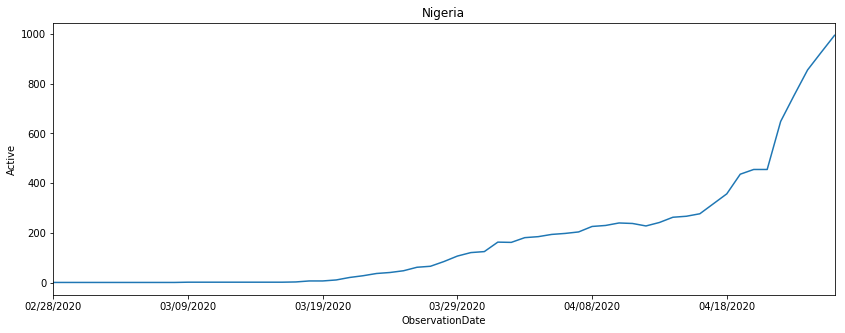

In [982]:
nigeria3 = plot_country_cases(df3, "Nigeria", True, col="Active")

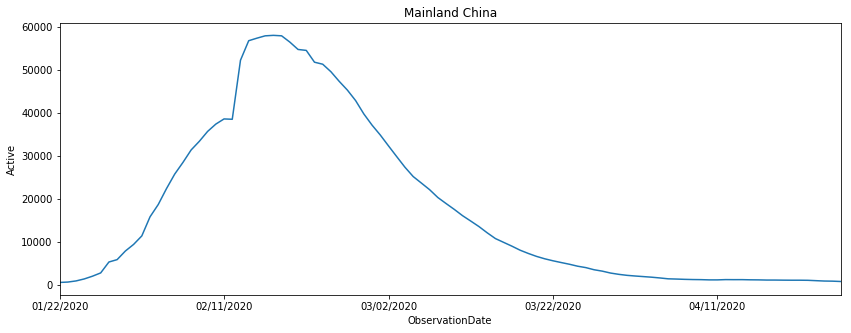

In [983]:
china3 = plot_country_cases(df3, "Mainland China",  True, col="Active")

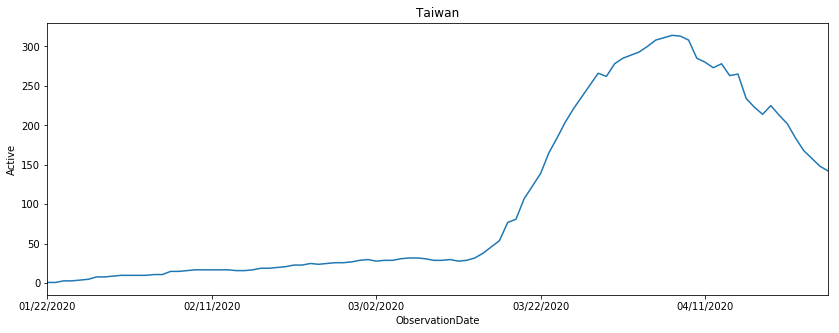

In [984]:
taiwan3 = plot_country_cases(df3, "Taiwan",  True, col="Active")

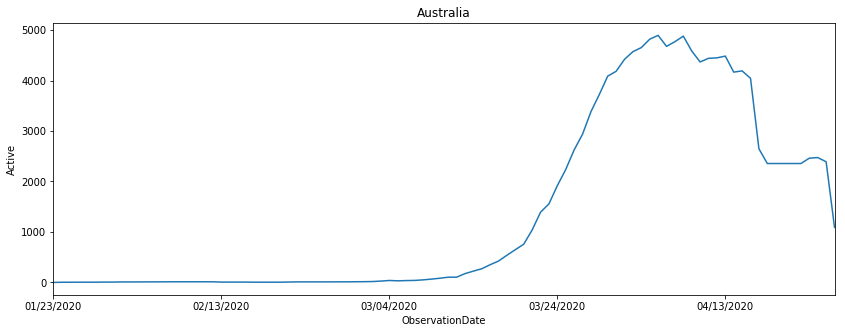

In [985]:
australia3 = plot_country_cases(df3, "Australia", True,  col="Active")

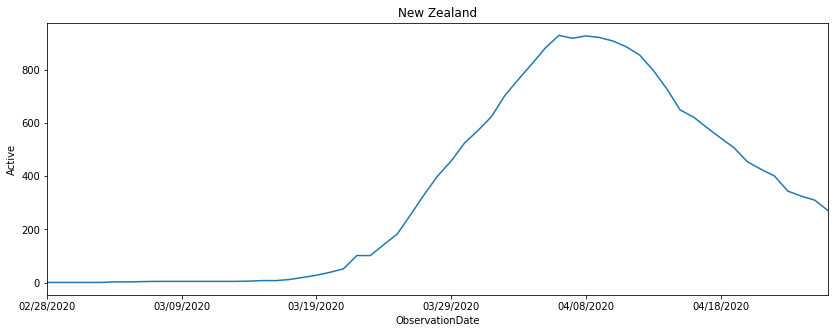

In [986]:
new_zealand3 = plot_country_cases(df3, "New Zealand",  True, col="Active")

In [987]:
taiwan3 = addminmax(taiwan3,21,"Active")

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


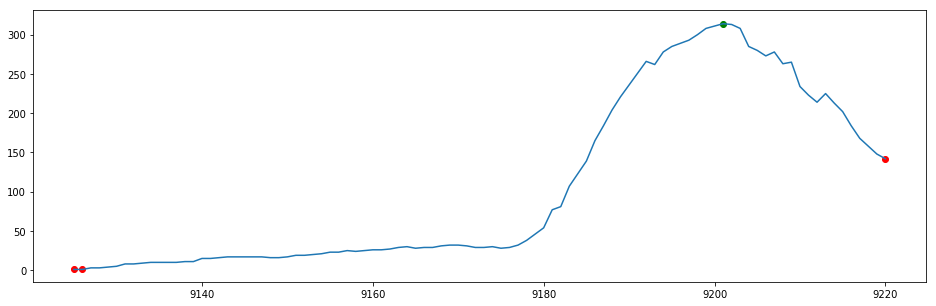

In [988]:
plot_min_max(taiwan3,"Active")

In [989]:
def create_minmax_and_plot(df, col, n):
    df = addminmax(df,21,col)
    plot_min_max(df,col)

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


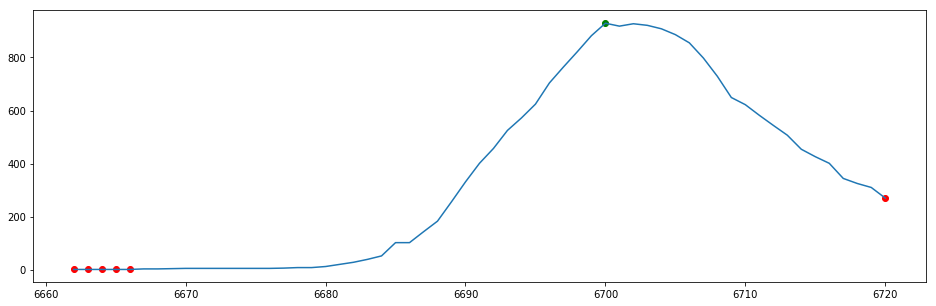

In [990]:
create_minmax_and_plot(new_zealand3, "Active", 21)

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


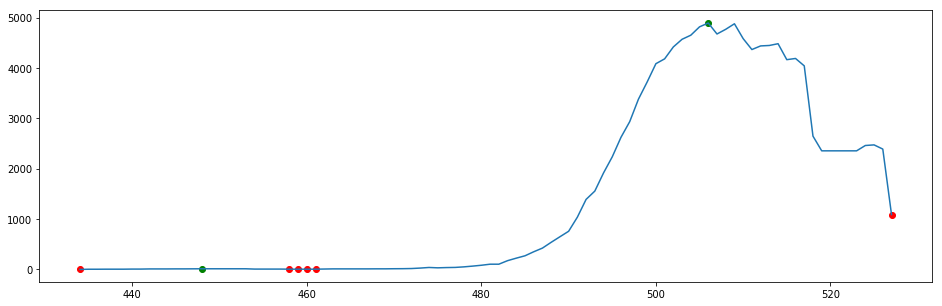

In [991]:
create_minmax_and_plot(australia3, "Active", 21)

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


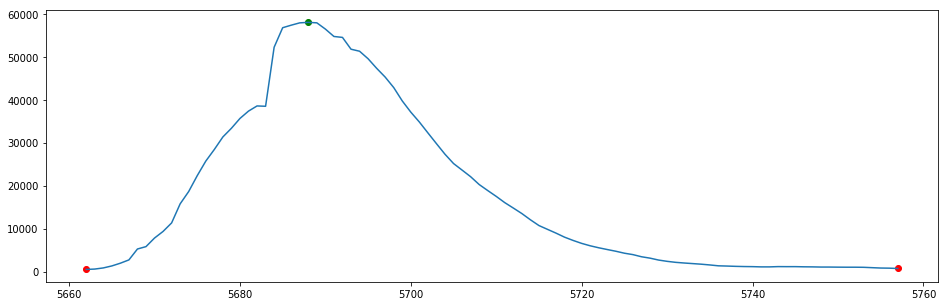

In [992]:
create_minmax_and_plot(china3, "Active", 21)

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


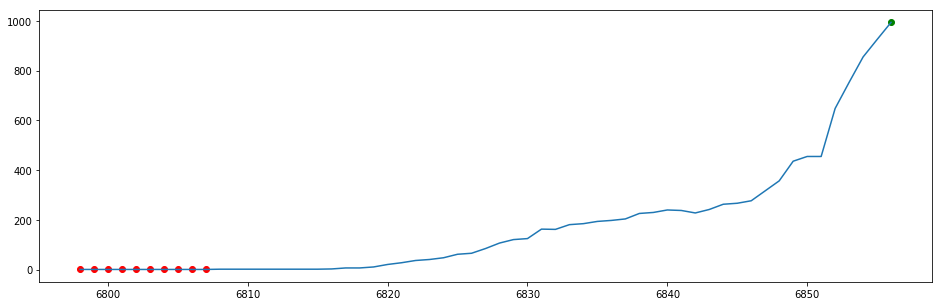

In [993]:
create_minmax_and_plot(nigeria3, "Active", 21)

# Answering Q1

From the above we have an indication of the peaks, and we can create mectric for all countries that indicate the dcuration from the index covid19 case to the peak. Countries that are yet to reach their peak will not be included in answering question 1. 

In [994]:
#Let's take a look at China since it has a clear peak
china3.head()

,Country/Region,ObservationDate,SNo,Province/State,Last Update,Confirmed,Deaths,Recovered,Date,Active,Active_min,Active_max
5662,Mainland China,01/22/2020,1,NaN,1/22/2020 17:00,547.0,17.0,28.0,2020-01-22 17:00:00,502.0,502.0,NaN
5663,Mainland China,01/23/2020,39,NaN,1/23/20 17:00,639.0,18.0,30.0,2020-01-23 17:00:00,591.0,NaN,NaN
5664,Mainland China,01/24/2020,85,NaN,1/24/20 17:00,916.0,26.0,36.0,2020-01-24 17:00:00,854.0,NaN,NaN
5665,Mainland China,01/25/2020,126,NaN,1/25/20 17:00,1399.0,42.0,39.0,2020-01-25 17:00:00,1318.0,NaN,NaN
5666,Mainland China,01/26/2020,170,NaN,1/26/20 16:00,2062.0,56.0,49.0,2020-01-26 16:00:00,1957.0,NaN,NaN


In [995]:
china_peak = china3[pd.notna(china3["Active_max"])]# & (china3["Active"]).astype('float')>1]

In [996]:
china_peak

,Country/Region,ObservationDate,SNo,Province/State,Last Update,Confirmed,Deaths,Recovered,Date,Active,Active_min,Active_max
5688,Mainland China,02/17/2020,1641,NaN,2020-02-12T06:43:02,72364.0,1863.0,12455.0,2020-02-17 23:13:06,58046.0,NaN,58046.0


In [997]:
peak_date = ps.parse(china_peak["ObservationDate"].values[0])
peak_date

datetime.datetime(2020, 2, 17, 0, 0)

In [998]:
indexcase_date = ps.parse(china3["ObservationDate"].iloc[0])
indexcase_date

datetime.datetime(2020, 1, 22, 0, 0)

In [999]:
duration = peak_date-indexcase_date

In [1000]:
duration.days

26

In [1001]:
last_date = ps.parse(china3.tail(1)["ObservationDate"].values[0])
last_date

datetime.datetime(2020, 4, 26, 0, 0)

In [1002]:
last_date == peak_date

False

#### We have the basics

In the above cells we have the basics to anser this question. So let us proceed to create a funciton that provides the time to peak for all countries, and then we can sort it by calues to answer **Q1**.

In [1003]:
def get_time_to_peak(df, countries_list):
    
    results_df = pd.DataFrame(columns=['Country', 'index_date', 'peak_date', 'duration', 'has_peaked'])
    
    for idx, country in enumerate(countries_list):
        ctry = df[df["Country/Region"]==country] 
        addminmax(ctry, 21, "Active")
        ctry_peak = ctry[pd.notna(ctry["Active_max"])]
        peak_date = ps.parse(ctry_peak["ObservationDate"].values[0])
        last_date = ps.parse(ctry.tail(1)["ObservationDate"].values[0])
        indexcase_date = ps.parse(ctry["ObservationDate"].iloc[0])
        duration = (peak_date-indexcase_date).days
        
        results_df.loc[idx] = [country, indexcase_date, peak_date, duration, peak_date!=last_date]
        #results[country] = duration
    return results_df
    

In [1004]:
df3.head()

,Country/Region,ObservationDate,SNo,Province/State,Last Update,Confirmed,Deaths,Recovered,Date,Active
0,Azerbaijan,02/28/2020,2664,NaN,2020-02-28T15:03:26,1.0,0.0,0.0,2020-02-28 15:03:26,1.0
1,"('St. Martin',)",03/10/2020,4675,NaN,2020-03-10T05:33:02,2.0,0.0,0.0,2020-03-10 05:33:02,2.0
2,Afghanistan,02/24/2020,2259,NaN,2020-02-24T23:33:02,1.0,0.0,0.0,2020-02-24 23:33:02,1.0
3,Afghanistan,02/25/2020,2352,NaN,2020-02-24T23:33:02,1.0,0.0,0.0,2020-02-24 23:33:02,1.0
4,Afghanistan,02/26/2020,2453,NaN,2020-02-24T23:33:02,1.0,0.0,0.0,2020-02-24 23:33:02,1.0


In [1005]:
get_time_to_peak(df3,["Mainland China","Nigeria", "Australia"])

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,index_date,peak_date,duration,has_peaked
0,Mainland China,2020-01-22,2020-02-17,26,True
1,Nigeria,2020-02-28,2020-04-26,58,False
2,Australia,2020-01-23,2020-02-07,15,True


In [1006]:
peak_df = get_time_to_peak(df3, countries)

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1007]:
peak_df

,Country,index_date,peak_date,duration,has_peaked
0,Mainland China,2020-01-22,2020-02-17,26,True
1,Hong Kong,2020-01-22,2020-04-07,76,True
2,Macau,2020-01-22,2020-02-04,13,True
3,Taiwan,2020-01-22,2020-04-07,76,True
4,US,2020-01-22,2020-04-26,95,False
5,Japan,2020-01-22,2020-04-26,95,False
6,Thailand,2020-01-22,2020-02-11,20,True
7,South Korea,2020-01-22,2020-03-15,53,True
8,Singapore,2020-01-23,2020-04-26,94,False
9,Philippines,2020-01-23,2020-02-07,15,True


C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


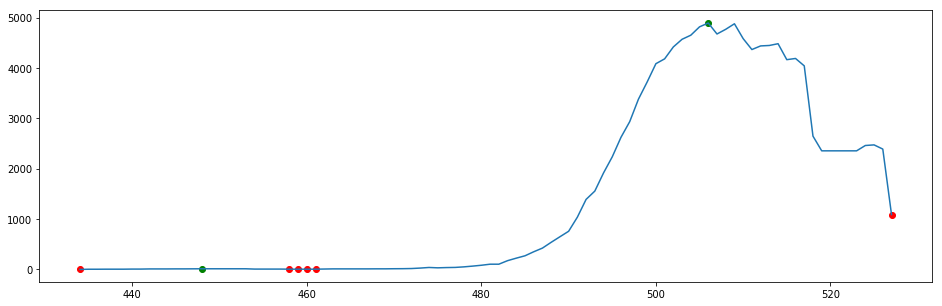

In [1008]:
#Let's take a look at Australia again

create_minmax_and_plot(australia3, "Active", 21)

- the first peak is a false peak, and we need to remove ti from the analysis. 
- for the purpose of this excercise we will only be interested in coutried that peak after reaching at least 500 cases.

In [1009]:
aus_peak = australia3[pd.notna(australia3["Active_max"])]

In [1010]:
aus_peak

,Country/Region,ObservationDate,SNo,Province/State,Last Update,Confirmed,Deaths,Recovered,Date,Active,Active_min,Active_max
448,Australia,02/07/2020,950,NaN,2020-02-01T18:12:49,15.0,0.0,2.0,2020-02-07 01:03:02,13.0,NaN,13.0
506,Australia,04/05/2020,12116,NaN,2020-04-05 23:13:44,5687.0,35.0,757.0,2020-04-05 23:13:44,4895.0,NaN,4895.0


In [1011]:
aus_peak.shape[0]

2

In [1012]:
aus_peak2 = aus_peak[aus_peak["Confirmed"]>500.0]

In [1013]:
aus_peak2

,Country/Region,ObservationDate,SNo,Province/State,Last Update,Confirmed,Deaths,Recovered,Date,Active,Active_min,Active_max
506,Australia,04/05/2020,12116,NaN,2020-04-05 23:13:44,5687.0,35.0,757.0,2020-04-05 23:13:44,4895.0,NaN,4895.0


In [1014]:
#Let's modify the get_time_to_peak function above

def get_time_to_peak(df, countries_list):
    nan_value = float("NaN")
    results_df = pd.DataFrame(columns=['Country', 'index_date', 'peak_date', 'duration', 'has_peaked', "No_of_Peaks"])
    
    for idx, country in enumerate(countries_list):
        ctry = df[df["Country/Region"]==country] 
        addminmax(ctry, 21, "Active")
        ctry_peak = ctry[pd.notna(ctry["Active_max"])]
        num_peaks = ctry_peak[ctry_peak["Active"]>500.0]
        num_peaks = int(ctry_peak.shape[0])
        
        indexcase_date = ps.parse(ctry["ObservationDate"].iloc[0])
        
        if num_peaks > 0:
            peak_date = ps.parse(ctry_peak["ObservationDate"].values[0])
            last_date = ps.parse(ctry.tail(1)["ObservationDate"].values[0])
            duration = (peak_date-indexcase_date).days
        else:
            peak_date = nan_value
            last_date = nan_value            
            duration = nan_value 
        
        
        
        results_df.loc[idx] = [country, indexcase_date, peak_date, duration, peak_date!=last_date, num_peaks]
        #results[country] = duration
    return results_df

In [1015]:
peak_df = get_time_to_peak(df3, countries)

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1016]:
peak_df[peak_df["has_peaked"]]

,Country,index_date,peak_date,duration,has_peaked,No_of_Peaks
0,Mainland China,2020-01-22,2020-02-17,26,True,1
1,Hong Kong,2020-01-22,2020-04-07,76,True,1
2,Macau,2020-01-22,2020-02-04,13,True,6
3,Taiwan,2020-01-22,2020-04-07,76,True,1
6,Thailand,2020-01-22,2020-02-11,20,True,4
7,South Korea,2020-01-22,2020-03-15,53,True,1
9,Philippines,2020-01-23,2020-02-07,15,True,6
10,Malaysia,2020-01-23,2020-02-10,18,True,2
11,Vietnam,2020-01-23,2020-02-10,18,True,2
12,Australia,2020-01-23,2020-02-07,15,True,2


In [1017]:
peak_df2 = peak_df[peak_df["has_peaked"]]
peak_df2 = peak_df2[peak_df2["No_of_Peaks"]>1]
peak_df2

,Country,index_date,peak_date,duration,has_peaked,No_of_Peaks
2,Macau,2020-01-22,2020-02-04,13,True,6
6,Thailand,2020-01-22,2020-02-11,20,True,4
9,Philippines,2020-01-23,2020-02-07,15,True,6
10,Malaysia,2020-01-23,2020-02-10,18,True,2
11,Vietnam,2020-01-23,2020-02-10,18,True,2
12,Australia,2020-01-23,2020-02-07,15,True,2
17,Nepal,2020-01-25,2020-01-25,0,True,19
19,Cambodia,2020-01-27,2020-01-27,0,True,17
20,Sri Lanka,2020-01-27,2020-01-27,0,True,13
23,Finland,2020-01-29,2020-01-29,0,True,11


### Analysis

There are countries with multiple peaks. Let's take a look at a few with data visuals to see if these peaks are true or false.

To make it easier to create multiple charts, we wll define a functiont to do this. 

In [1018]:
def filter_create_minmax_and_plot(df, country, col, n=21):
    '''
    Plots the chart from a dtaframe for specified country &  column
    and also shows the minima & maxima
    
    INPUTS:
    df - the datafram
    country - the country of interest
    col - the coulmn to plot, and check for mimia & maxima
    n - the span to test for mimna andmaxima default=21
    
    OUTPUTS:
    None
    '''
    df = df[df["Country/Region"] == country]
    ##df = addminmax(df,n,col)
     
    df[col+'_min'] = df.iloc[argrelextrema(df[col].values, np.less_equal, order=n)[0]][col]
    #df.loc[:,col+'_min']= df.iloc[argrelextrema(df[col].values, np.less_equal, order=n)[0]][col]
    df[col+'_max'] = df.iloc[argrelextrema(df[col].values, np.greater_equal, order=n)[0]][col]

    plt.figure(figsize=(18,6))
    #plt.title = title="Infection Minima (red) & Maxima (green) for "+country
    
    plt.scatter(df.index, df[col+'_min'], c='r')
    plt.scatter(df.index, df[col+'_max'], c='g')
    ax = plt.plot(df.index, df[col])
    
    plt.show()

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


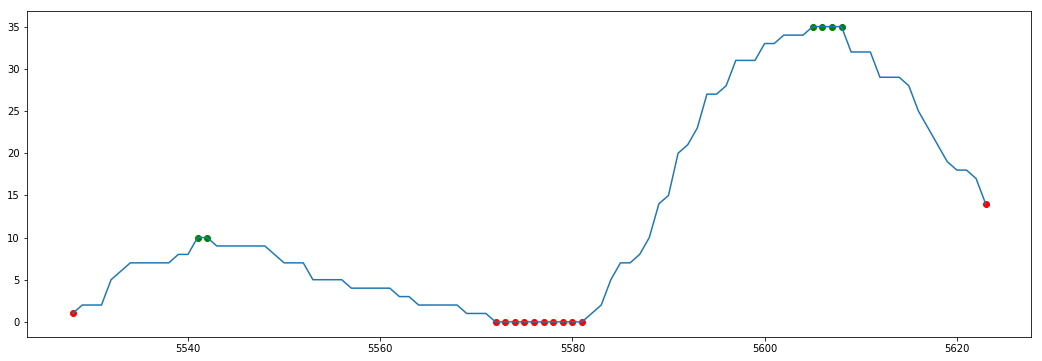

In [1019]:
filter_create_minmax_and_plot(df3, "Macau", "Active")

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


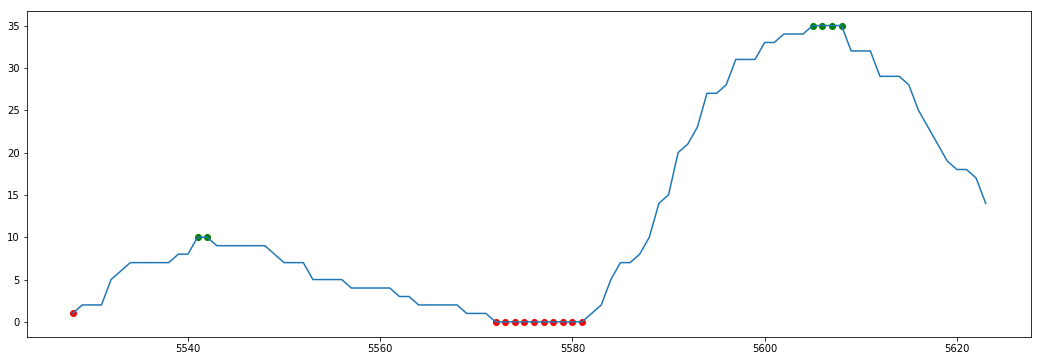

In [1020]:
filter_create_minmax_and_plot(df3, "Macau", "Active", n = 42)

In [1021]:
macau3 = addminmax(macau3,21,"Active")

In [1022]:
macau_peak = macau3[pd.notna(macau3["Active_max"])]

In [1023]:
macau_peak

,Country/Region,ObservationDate,SNo,Province/State,Last Update,Confirmed,Deaths,Recovered,Date,Active,Active_min,Active_max,Active_max_adj
5541,Macau,02/04/2020,733,NaN,2020-02-04T04:43:02,10.0,0.0,0.0,2020-02-04 04:43:02,10.0,NaN,10.0,0.0
5542,Macau,02/05/2020,804,NaN,2020-02-04T04:43:02,10.0,0.0,0.0,2020-02-04 04:43:02,10.0,NaN,10.0,0.0
5605,Macau,04/08/2020,13131,NaN,2020-04-08 22:59:00,45.0,0.0,10.0,2020-04-08 22:59:00,35.0,NaN,35.0,0.0
5606,Macau,04/09/2020,13451,NaN,2020-04-09 23:09:19,45.0,0.0,10.0,2020-04-09 23:09:19,35.0,NaN,35.0,0.0
5607,Macau,04/10/2020,13772,NaN,2020-04-10 23:01:43,45.0,0.0,10.0,2020-04-10 23:01:43,35.0,NaN,35.0,0.0
5608,Macau,04/11/2020,14093,NaN,2020-04-11 22:52:46,45.0,0.0,10.0,2020-04-11 22:52:46,35.0,NaN,35.0,0.0


In [1024]:
# Let's attempt to remove the duplicates
peaks = macau_peak["Active_max"].tolist()
peaks

[10.0, 10.0, 35.0, 35.0, 35.0, 35.0]

In [1025]:
#macau_peak['Active_max_adj'] = (macau_peak.Active_max.diff().fillna(0)).shift(-1).fillna(10)
#macau_peak.drop('Active_max_adj', axis=1, inplace=True)

In [1026]:
macau_peak

,Country/Region,ObservationDate,SNo,Province/State,Last Update,Confirmed,Deaths,Recovered,Date,Active,Active_min,Active_max,Active_max_adj
5541,Macau,02/04/2020,733,NaN,2020-02-04T04:43:02,10.0,0.0,0.0,2020-02-04 04:43:02,10.0,NaN,10.0,0.0
5542,Macau,02/05/2020,804,NaN,2020-02-04T04:43:02,10.0,0.0,0.0,2020-02-04 04:43:02,10.0,NaN,10.0,0.0
5605,Macau,04/08/2020,13131,NaN,2020-04-08 22:59:00,45.0,0.0,10.0,2020-04-08 22:59:00,35.0,NaN,35.0,0.0
5606,Macau,04/09/2020,13451,NaN,2020-04-09 23:09:19,45.0,0.0,10.0,2020-04-09 23:09:19,35.0,NaN,35.0,0.0
5607,Macau,04/10/2020,13772,NaN,2020-04-10 23:01:43,45.0,0.0,10.0,2020-04-10 23:01:43,35.0,NaN,35.0,0.0
5608,Macau,04/11/2020,14093,NaN,2020-04-11 22:52:46,45.0,0.0,10.0,2020-04-11 22:52:46,35.0,NaN,35.0,0.0


In [1027]:
old_indx = None
res = []
for indx in macau_peak.index: 
    #macau_peak['Valid'] = False
    if old_indx == None:
        #macau_peak['Valid'][indx]= True
        res.append(True)
        old_indx = indx
        continue
    duration = ps.parse(macau_peak['ObservationDate'][indx])-ps.parse(macau_peak['ObservationDate'][old_indx])
    diff = macau_peak['Active_max'][indx]-macau_peak['Active_max'][old_indx]
    #print(duration.days, diff)
    res.append(diff > 0)
    
    #macau_peak['Valid'][indx]= ()
        
    old_indx = indx
#print(res)
macau_peak['Valid'] = res



C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1028]:
macau_peak

,Country/Region,ObservationDate,SNo,Province/State,Last Update,Confirmed,Deaths,Recovered,Date,Active,Active_min,Active_max,Active_max_adj,Valid
5541,Macau,02/04/2020,733,NaN,2020-02-04T04:43:02,10.0,0.0,0.0,2020-02-04 04:43:02,10.0,NaN,10.0,0.0,True
5542,Macau,02/05/2020,804,NaN,2020-02-04T04:43:02,10.0,0.0,0.0,2020-02-04 04:43:02,10.0,NaN,10.0,0.0,False
5605,Macau,04/08/2020,13131,NaN,2020-04-08 22:59:00,45.0,0.0,10.0,2020-04-08 22:59:00,35.0,NaN,35.0,0.0,True
5606,Macau,04/09/2020,13451,NaN,2020-04-09 23:09:19,45.0,0.0,10.0,2020-04-09 23:09:19,35.0,NaN,35.0,0.0,False
5607,Macau,04/10/2020,13772,NaN,2020-04-10 23:01:43,45.0,0.0,10.0,2020-04-10 23:01:43,35.0,NaN,35.0,0.0,False
5608,Macau,04/11/2020,14093,NaN,2020-04-11 22:52:46,45.0,0.0,10.0,2020-04-11 22:52:46,35.0,NaN,35.0,0.0,False


In [1029]:
def validate_min_max(df, col):
    #print('df', df.index)
    old_indx = None
    res = []
    for indx in df.index: 
        if old_indx == None:        
            res.append(True)
            old_indx = indx
            continue
        duration = ps.parse(df['ObservationDate'][indx])-ps.parse(df['ObservationDate'][old_indx])
        diff = df[col][indx]-df[col][old_indx]

        res.append(diff > 0)
        old_indx = indx
    #print("res", res)
    #print(df.shape)
    df[col+'_valid'] = res

In [1030]:
def get_time_to_peak_validated(df, countries_list, limit=500):
    nan_value = float("NaN")
    results_df = pd.DataFrame(columns=['Country', 'index_date', 'peak_date', 'duration', 'has_peaked', "No_of_Peaks"])
    
    for idx, country in enumerate(countries_list):
        ctry = df[df["Country/Region"] == country] 
        addminmax(ctry, 21, "Active")
        
        #############
        ctry_peak = ctry[pd.notna(ctry["Active_max"])]
        ctry_peak = ctry_peak[ctry_peak["Active"]>limit]
        validate_min_max(ctry_peak, "Active_max")
    
        valid_peaks = list(ctry_peak[ctry_peak["Active_max_valid"]].index)
        
        #valid_peaks = list(ctry_peak[ctry_peak['Active_max_valid']].index)
        ctry_peak['Active_max'] = np.where((ctry_peak.index.isin(valid_peaks)), ctry_peak['Active_max'], nan_value)
        ###############
        
        
        #df_peak = df[pd.notna(df[col+'_max'])]
        #df_peak = df_peak[df_peak["Confirmed"]>limit]
        #validate_min_max(df_peak, col+'_max')
        #df_peak = list(df_peak[df_peak[col+'_max_valid']].index)

        #df[col+'_max'] = np.where((df.index.isin(df_peak)),df[col+'_max'],nan_value)
        ############
        num_peaks = len(valid_peaks) #ctry_peak[ctry_peak["Confirmed"]>limit]
        #num_peaks = int(ctry_peak.shape[0])
        
        indexcase_date = ps.parse(ctry["ObservationDate"].iloc[0])
        
        if num_peaks > 0:
            peak_date = ps.parse(ctry_peak["ObservationDate"].values[0])
            last_date = ps.parse(ctry.tail(1)["ObservationDate"].values[0])
            duration = (peak_date-indexcase_date).days
        else:
            peak_date = nan_value
            last_date = nan_value            
            duration = nan_value 
        
        
        
        results_df.loc[idx] = [country, indexcase_date, peak_date, duration, peak_date!=last_date, num_peaks]
        #results[country] = duration
    return results_df



In [1031]:
peak_df_v = get_time_to_peak_validated(df3, countries)
#peak_df_v = get_time_to_peak_validated(df3,['Macau', 'Thailand', 'Philippines', 'Malaysia', 'Vietnam',
#       'Australia', 'Nepal', 'Cambodia', 'Sri Lanka', 'Finland', 'India',
#       'Russia', 'Sweden', 'Belgium', 'Maldives', 'Eswatini',
#       'Central African Republic', 'Zambia', 'Timor-Leste'])

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1032]:
peak_df_v_v = peak_df_v[peak_df_v["has_peaked"]]

In [1033]:
peak_df_v_v

,Country,index_date,peak_date,duration,has_peaked,No_of_Peaks
0,Mainland China,2020-01-22,2020-02-17,26,True,1
1,Hong Kong,2020-01-22,2020-04-07,76,True,1
2,Macau,2020-01-22,NaT,NaN,True,0
3,Taiwan,2020-01-22,NaT,NaN,True,0
6,Thailand,2020-01-22,2020-04-08,77,True,1
7,South Korea,2020-01-22,2020-03-15,53,True,1
10,Malaysia,2020-01-23,2020-04-05,73,True,1
11,Vietnam,2020-01-23,NaT,NaN,True,0
12,Australia,2020-01-23,2020-04-05,73,True,1
13,Mexico,2020-01-23,2020-04-23,91,True,1


C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


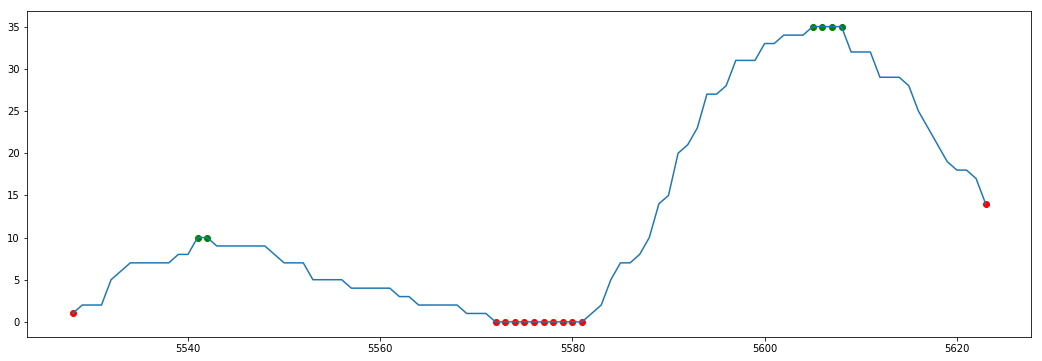

In [1034]:
filter_create_minmax_and_plot(df3, "Macau", "Active")

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


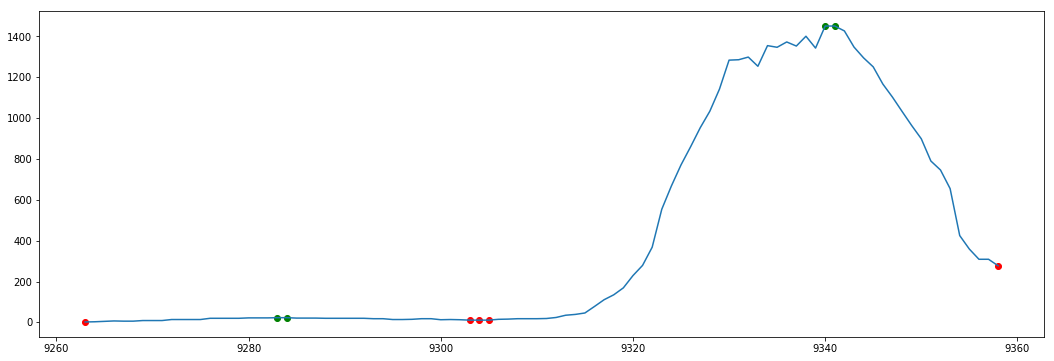

In [1035]:
filter_create_minmax_and_plot(df3, "Thailand", "Active")

In [1036]:
peak_df_v_v[peak_df_v_v["Country"]=="Macau"]

,Country,index_date,peak_date,duration,has_peaked,No_of_Peaks
2,Macau,2020-01-22,NaT,NaN,True,0


In [1037]:
peak_df_v[peak_df_v["Country"]=="Thailand"]

,Country,index_date,peak_date,duration,has_peaked,No_of_Peaks
6,Thailand,2020-01-22,2020-04-08,77,True,1


In [1038]:
def filter_create_minmax_and_plot_validated(df, country, col, n=21, limit=500):
    '''
    Plots a graph for the parameters provided and indicaes the mimima and maxima
    
    INPUTS:
    df - the source dataframe
    country - the country of interest
    col - the column of interest to be plotted
    n - the number of datapoints to th eleft and right to be used for determining minima & maxima
    limit - the limit of cases to be considered for peaks
    
    OUTPUTS:
    None
    '''
    df = df[df["Country/Region"]==country]
    ##df = addminmax(df,n,col)
    
    df[col+'_min'] = df.iloc[argrelextrema(df[col].values, np.less_equal, order=n)[0]][col]
    df[col+'_max'] = df.iloc[argrelextrema(df[col].values, np.greater_equal, order=n)[0]][col]
    
    df_peak = df[pd.notna(df[col+'_max'])]
    df_peak = df_peak[df_peak["Active"]>limit]
    validate_min_max(df_peak, col+'_max')
    df_peak = list(df_peak[df_peak[col+'_max_valid']].index)
    
    #print(df_peak)
    
    df[col+'_max'] = np.where((df.index.isin(df_peak)),df[col+'_max'],nan_value)

    plt.figure(figsize=(18,6))
    plt.scatter(df.index, df[col+'_min'], c='r')
    plt.scatter(df.index, df[col+'_max'], c='g')
    ax = plt.plot(df.index, df[col])
  
    plt.show()

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

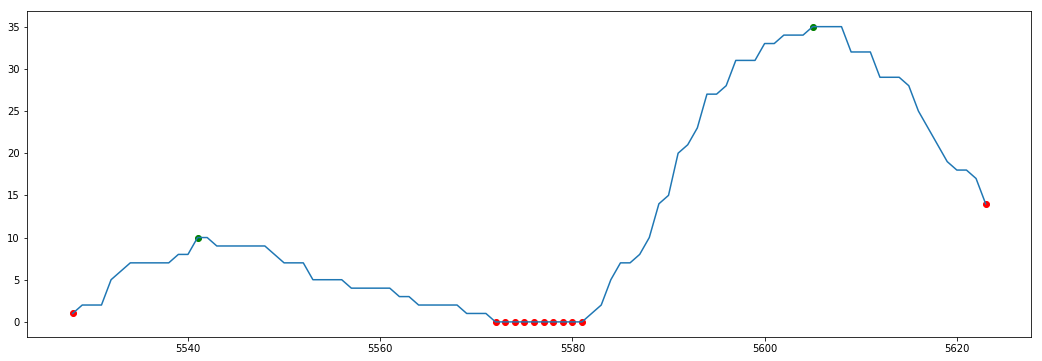

In [1039]:
filter_create_minmax_and_plot_validated(df3, "Macau", "Active", limit=0)

# Sucess! Now We have valid peak data

- Let us now extract countries with the earliest peaks
- but before we do that, let's do some validation, to see the maximum number of peaks

In [1040]:
peak_df_v_v['No_of_Peaks'].unique()

array([1, 0], dtype=object)

### Analysis

- The maximum is two which apears realistic. Let's see the specific countries, and do some plots to validate

In [1041]:
peak_df_v_v[peak_df_v_v['No_of_Peaks']==2]['Country'].unique()

array([], dtype=object)

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

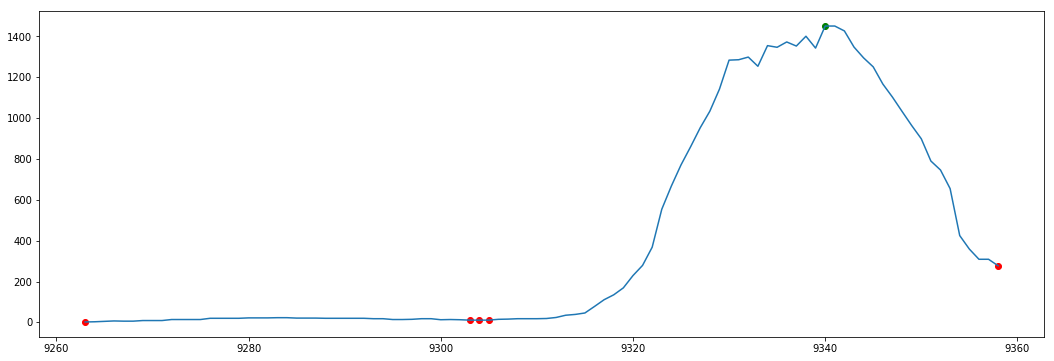

In [1042]:
filter_create_minmax_and_plot_validated(df3, "Thailand", "Active")

## Lower the Limit

the limit of active cases being above 500 seems too high, let's lower it and check if we will have any two peaks

In [1043]:
peak_df_v2 = get_time_to_peak_validated(df3, countries, limit = 25)

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1044]:
peak_df_v_v2 = peak_df_v2[peak_df_v2["has_peaked"]]

In [1045]:
peak_df_v_v2_cleaned = peak_df_v_v2[peak_df_v_v2['duration']>0]
peak_df_v_v2_cleaned.sort_values('duration', ascending=False)

,Country,index_date,peak_date,duration,has_peaked,No_of_Peaks
13,Mexico,2020-01-23,2020-04-23,91,True,1
16,France,2020-01-24,2020-04-21,88,True,1
17,Nepal,2020-01-25,2020-04-21,87,True,1
30,Spain,2020-02-01,2020-04-25,84,True,1
26,Italy,2020-01-31,2020-04-19,79,True,1
23,Finland,2020-01-29,2020-04-15,77,True,1
2,Macau,2020-01-22,2020-04-08,77,True,1
6,Thailand,2020-01-22,2020-04-08,77,True,1
1,Hong Kong,2020-01-22,2020-04-07,76,True,1
3,Taiwan,2020-01-22,2020-04-07,76,True,1


C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

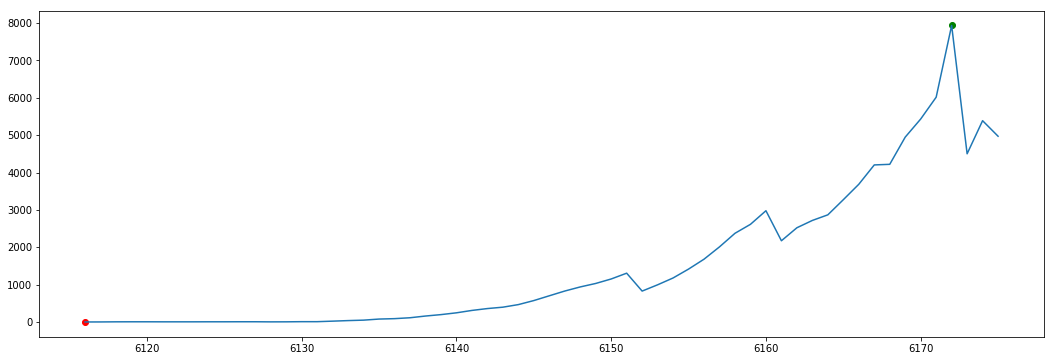

In [1046]:
filter_create_minmax_and_plot_validated(df3, "Mexico", "Active", limit=25)

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

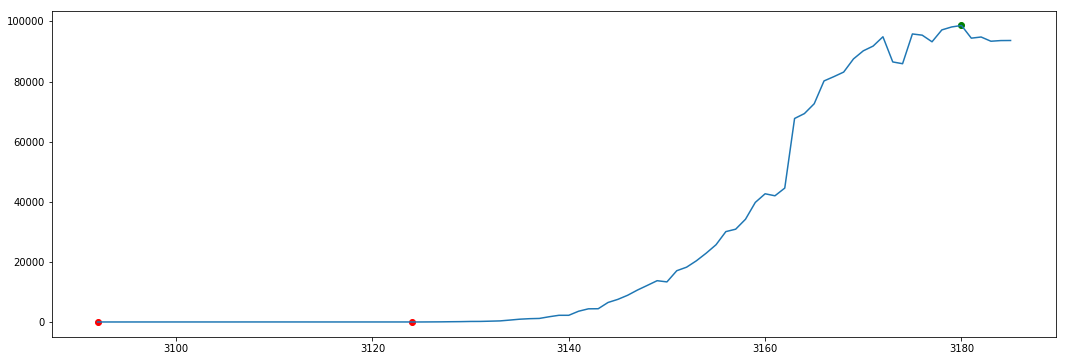

In [1047]:
filter_create_minmax_and_plot_validated(df3, "France", "Active", limit=25)

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

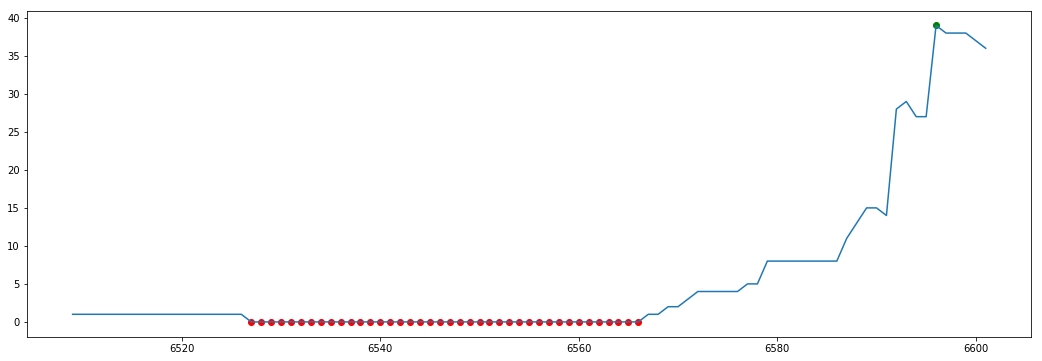

In [1048]:
filter_create_minmax_and_plot_validated(df3, "Nepal", "Active", limit=25)

# Question 2

- To anser tis question: "Which countries have reached the peak and past it, and which ones did that first?"

- We will look at qhich countries peaked early and tcompared to their populations

In [1049]:
peak_df_v_v2_cleaned.sort_values('duration', ascending=True)

,Country,index_date,peak_date,duration,has_peaked,No_of_Peaks
104,Martinique,2020-03-07,2020-03-20,13,True,1
176,Zambia,2020-03-18,2020-04-02,15,True,2
139,Uruguay,2020-03-14,2020-03-30,16,True,1
114,Brunei,2020-03-09,2020-03-26,17,True,1
194,Uganda,2020-03-21,2020-04-08,18,True,1
32,Others,2020-02-07,2020-02-26,19,True,1
215,Malawi,2020-04-02,2020-04-23,21,True,1
184,Madagascar,2020-03-20,2020-04-11,22,True,1
175,Mauritius,2020-03-18,2020-04-10,23,True,1
171,Barbados,2020-03-17,2020-04-12,26,True,1


# Question 3

To answer tis question: "which countries have had a re-surge in cases after an initial control?"

We will look at which countries have peaked more than onces

In [1050]:
peak_df_v_v2['No_of_Peaks'].unique()

array([1, 0, 2], dtype=object)

In [1051]:
peak_df_v_v2[peak_df_v_v2['No_of_Peaks']==2]

,Country,index_date,peak_date,duration,has_peaked,No_of_Peaks
176,Zambia,2020-03-18,2020-04-02,15,True,2


C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

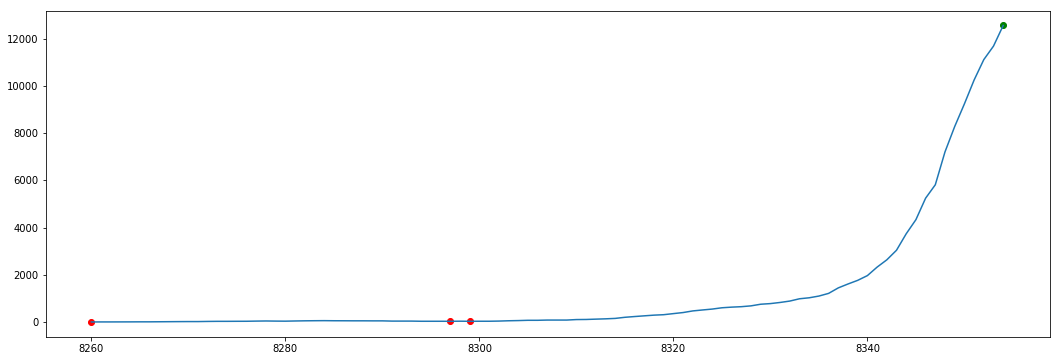

In [1052]:
filter_create_minmax_and_plot_validated(df3, "Singapore", "Active")

C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Abuba\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

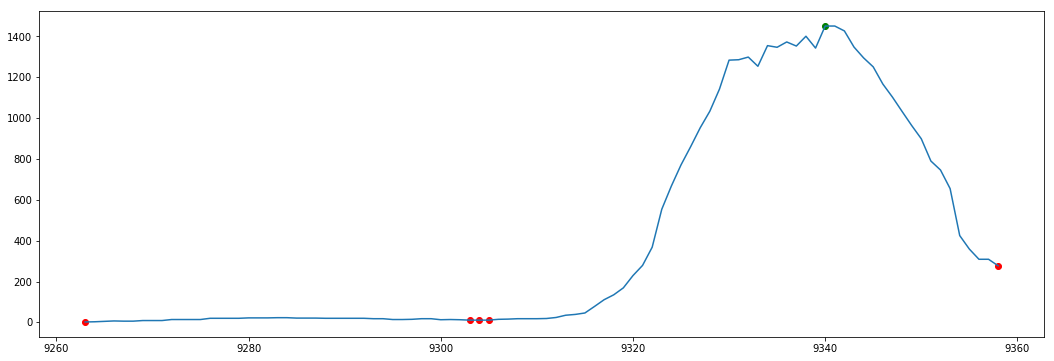

In [1053]:
filter_create_minmax_and_plot_validated(df3, "Thailand", "Active", limit=25)

It does not appear this are genuine peaks. And so we will conclude that at this point, it is probably too early to determine the answer to this quesiton.